In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
pima = pd.read_csv("D:/Dixant/CDAC/Machine Learning/16-12-21/diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
print(pima.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(pima.loc[:, pima.columns !='Outcome'],pima['Outcome'], stratify=pima['Outcome'], random_state=42)

In [7]:
print(y_train.value_counts())
print(y_test.value_counts())

0    375
1    201
Name: Outcome, dtype: int64
0    125
1     67
Name: Outcome, dtype: int64


In [8]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())
feature_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
class_name

[0, 1]

In [10]:
model = RandomForestClassifier(n_estimators=20)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7135416666666666


In [12]:
list1=[]
for i in range(5,40):
    list1.append(i)

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators' : list1}

In [14]:
model = RandomForestClassifier(n_estimators=i)

In [15]:
gridsearch = GridSearchCV(model, param_grid,cv=4)

In [16]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_estimators=39),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, ...]})

In [17]:
gridsearch.best_params_

{'n_estimators': 34}

In [18]:
gridsearch.best_score_

0.7847222222222222

In [21]:
model = RandomForestClassifier(n_estimators=34)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [41]:
a=[]
b=[]
for i in range(5,150,10):
    a.append(i)
    model = RandomForestClassifier(n_estimators=i)
    model=model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    j=metrics.accuracy_score(y_test, y_pred)
    b.append(j)

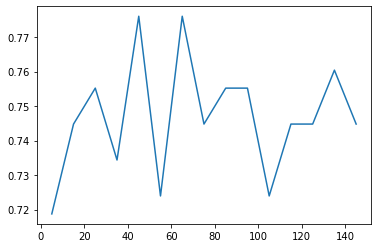

In [42]:
plt.plot(a,b)
plt.show()

In [43]:
a=[]
b=[]
for i in range(40,50,2):
    a.append(i)
    model = RandomForestClassifier(n_estimators=i)
    model=model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    j=metrics.accuracy_score(y_test, y_pred)
    b.append(j)

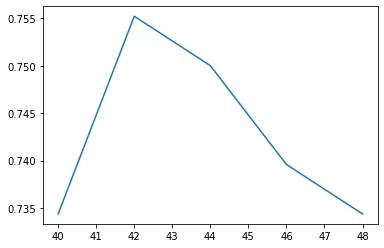

In [44]:
plt.plot(a,b)
plt.show()

In [45]:
model = RandomForestClassifier(n_estimators=42)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_test)
    
acc=metrics.accuracy_score(y_test, y_pred)
acc

0.7552083333333334